<a href="https://colab.research.google.com/github/estebanvz/redes_neuronales_pytorch/blob/aula-2/Redes_Neuronales_Deep_Learning_con_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura - Redes Neuronales: Deep Learning con PyTorch

## Pytorch vs Numpy

In [ ]:
TAMANO=1000000000

In [ ]:
import numpy as np
def funcion_activacion(x):
  if(x>=0.0):
    return 1
  else:
    return 0
class Perceptron():
  def __init__(self, datos_entrada):
    self.datos_entrada = np.array(datos_entrada)
    self.pesos = np.array([1.0,-1.0,1.0]*TAMANO)
  def forward(self,):
    self.datos_salida = self.datos_entrada @ self.pesos
    return funcion_activacion(self.datos_salida)


In [ ]:
%%time
datos_entrada = [0.22,0.170,0.80]*TAMANO
perceptron = Perceptron(datos_entrada)
prediccion = perceptron.forward()
prediccion

CPU times: user 119 µs, sys: 19 µs, total: 138 µs
Wall time: 132 µs


array([8.5e+08])

In [ ]:
import torch
gpu = torch.device("cuda")
class PerceptronTorch():
  def __init__(self, datos_entrada):
    self.datos_entrada = torch.tensor(datos_entrada).to(gpu)
    self.pesos = torch.tensor([1.0,-1.0,1.0]*TAMANO).to(gpu)
  def forward(self,):
    self.datos_salida = self.datos_entrada @ self.pesos
    return funcion_activacion(self.datos_salida)

In [ ]:
%%time
datos_entrada = [0.22,0.170,0.80]*TAMANO
perceptron = PerceptronTorch(datos_entrada)
prediccion = perceptron.forward()
prediccion

CPU times: user 482 ms, sys: 266 ms, total: 748 ms
Wall time: 2.37 s


1

## Operaciones con tensores

In [ ]:
import torch
torch.rand(size=(5,2)).double()

tensor([[0.5631, 0.7417],
        [0.0624, 0.4848],
        [0.4028, 0.8742],
        [0.5451, 0.5984],
        [0.6652, 0.2140]], dtype=torch.float64)

In [ ]:
pesos = torch.tensor([1.0,1.0,1.0])
tmp = torch.rand(size=(5,3))
tmp

tensor([[0.2300, 0.9002, 0.9436],
        [0.6944, 0.5942, 0.2988],
        [0.9712, 0.0767, 0.2143],
        [0.9327, 0.2489, 0.6932],
        [0.5626, 0.5014, 0.7176]])

In [ ]:
tmp @ pesos

tensor([2.0738, 1.5874, 1.2622, 1.8749, 1.7816])

In [ ]:
pesos = torch.tensor([[1.0,1.0,1.0]]).T
torch.mm(tmp,pesos)

tensor([[2.0738],
        [1.5874],
        [1.2622],
        [1.8749],
        [1.7816]])

In [ ]:
torch.mm(tmp,pesos) + torch.ones(size=(5,1))*2

tensor([[4.0738],
        [3.5874],
        [3.2622],
        [3.8749],
        [3.7816]])

## MLP
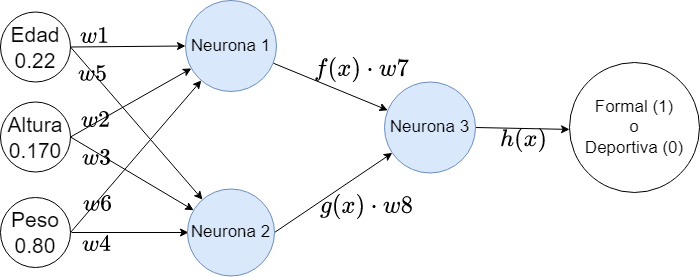

In [ ]:
import torch
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self, dim_1,dim_2,dim_3):
    super(MLP,self).__init__()
    self.capa1 = nn.Linear(dim_1,dim_2) ## dim_1 -> dimensión de los datos de entrada
    self.capa2 = nn.Linear(dim_2,dim_3) ## dim_2 -> dimensión de los datos de la primera capa
  def forward(self, data):
    resultado_capa1 = self.capa1(data) ## tmp = data @ pesos_capa1
    resultado_capa2 = self.capa2(resultado_capa1) ## tmp = tmp @ pesos_capa2
    return resultado_capa2


In [ ]:
mlp = MLP(dim_1=3,dim_2=2,dim_3=1)

In [ ]:
data =torch.tensor([10.0,1.0,1.0])
mlp.forward(data)

tensor([0.0026], grad_fn=<AddBackward0>)